In [2]:
from rkd.didactic import *

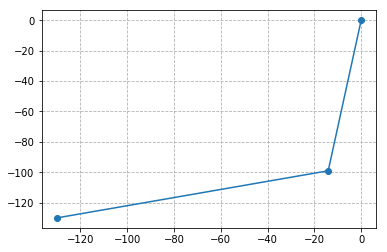

In [2]:
px,py = -130,-130
l1,l2 = 100,120

r = sqrt(px**2 + py**2)
alpha = atan2(py,px)
beta = acos((l1**2 + r**2 - l2**2)/(2*l1*r))
t1 = alpha + beta
t2 = -acos((r**2 - l1**2 - l2**2)/(2*l1*l2))
plt.plot([0, l1*cos(t1), l1*cos(t1) + l2*cos(t1+t2)], [0, l1*sin(t1), l1*sin(t1) + l2*sin(t1+t2)], "-o")
plt.grid(ls="--")

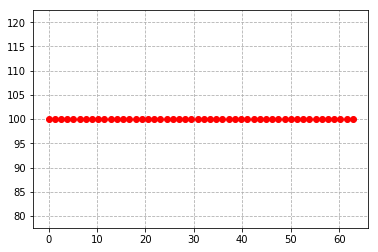

In [11]:
l1,l2 = 200,200
T1,T2 = [], []
for t in np.linspace(0, 2*np.pi):
    px, py = 10*t, 100
    K = (px**2 + py**2 - l1**2 - l2**2) / (2*l1*l2)
    t2 = atan2(sqrt(1-K**2), K)
    t1 = atan2( py*l1 + py*l2*cos(t2) - px*l2*sin(t2) , px*l1 + px*l2*cos(t2) + py*l2*sin(t2)  )
    T1.append(t1)
    T2.append(t2)
#     plt.plot([0, l1*cos(t1), l1*cos(t1) + l2*cos(t1+t2)], [0, l1*sin(t1), l1*sin(t1) + l2*sin(t1+t2)], "b-o")
    plt.plot([l1*cos(t1) + l2*cos(t1+t2)], [l1*sin(t1) + l2*sin(t1+t2)], "r-o")
    
plt.grid(ls="--")
plt.axis("equal");

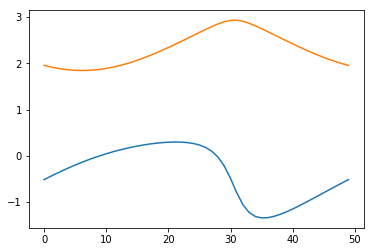

In [148]:
plt.plot(T1)
plt.plot(T2)

In [149]:
t = np.linspace(0,10)
np.savetxt("rr_t1.txt", np.column_stack((t,T1)), )
np.savetxt("rr_t2.txt", np.column_stack((t,T2)), )

In [150]:
T1P = np.diff(T1)/np.diff(t)
T2P = np.diff(T2)/np.diff(t)

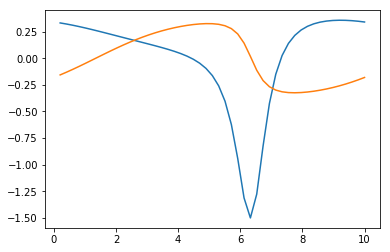

In [158]:
plt.plot(t[1:],T1P)
plt.plot(t[1:],T2P)

In [152]:
V = []
for k in range(len(T1)-1):
    t1 = T1[k+1]
    t2 = T2[k+1]
    t1p = T1P[k].evalf()
    t2p = T2P[k].evalf()
    r = Robot((l1,0,0,t1), (l1,0,0,t2))
    J = r.J.evalf()
    V.append( (J*Matrix([t1p,t2p]))[:2] )

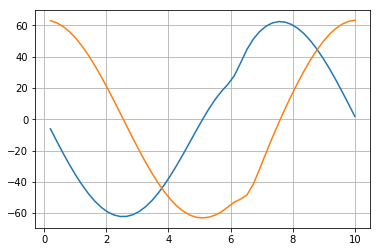

In [153]:
plt.plot(t[1:],V)
plt.grid()

In [154]:
V[0]

In [155]:
max([V[k][1] for k in range(len(V))])